In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Read CSV file
df = pd.read_csv("clean.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size
0,2024,Entry-level,Full-time,Data Analyst,20000,USD,20000,India,Remote,India,M
1,2024,Entry-level,Full-time,Data Reporting Analyst,58000,USD,58000,United States,In-person,United States,M
2,2024,Entry-level,Full-time,Data Reporting Analyst,42000,USD,42000,United States,In-person,United States,M
3,2024,Senior,Full-time,Data Manager,169680,USD,169680,United States,Remote,United States,M
4,2024,Senior,Full-time,Data Manager,113120,USD,113120,United States,Remote,United States,M


In [4]:
#Display info for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21302 entries, 0 to 21301
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           21302 non-null  int64 
 1   experience_level    21302 non-null  object
 2   employment_type     21302 non-null  object
 3   job_title           21302 non-null  object
 4   salary              21302 non-null  int64 
 5   salary_currency     21302 non-null  object
 6   salary_in_usd       21302 non-null  int64 
 7   employee_residence  21302 non-null  object
 8   work_setting        21302 non-null  object
 9   company_location    21302 non-null  object
 10  company_size        21302 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.8+ MB


In [5]:
#configure pandas to display all rows of the dataframe
pd.set_option('display.max_rows',None)
#use groupby to get the salary in usd and job titles related to them in a average, rounded by 2 for visual purposes
average_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().round(2)
#display the titles and average salaries
average_salary_by_title

job_title
AI Data Scientist                          60000.00
AWS Data Architect                        258000.00
Admin & Data Analyst                       69444.40
Applied Data Scientist                    102976.54
Azure Data Engineer                       100000.00
BI Data Analyst                            69351.69
BI Data Engineer                           60000.00
Big Data Architect                        126751.00
Big Data Developer                        117000.00
Big Data Engineer                          75299.20
Business Data Analyst                      75890.44
Business Intelligence Data Analyst         83209.50
CRM Data Analyst                           40000.00
Cloud Data Architect                      250000.00
Cloud Data Engineer                       131617.75
Cloud Database Engineer                   151980.77
Compliance Data Analyst                    45000.00
Consultant Data Engineer                   95692.67
Data Analyst                              108762.36
Da

<h3> What is the average salary by job title? <h3>

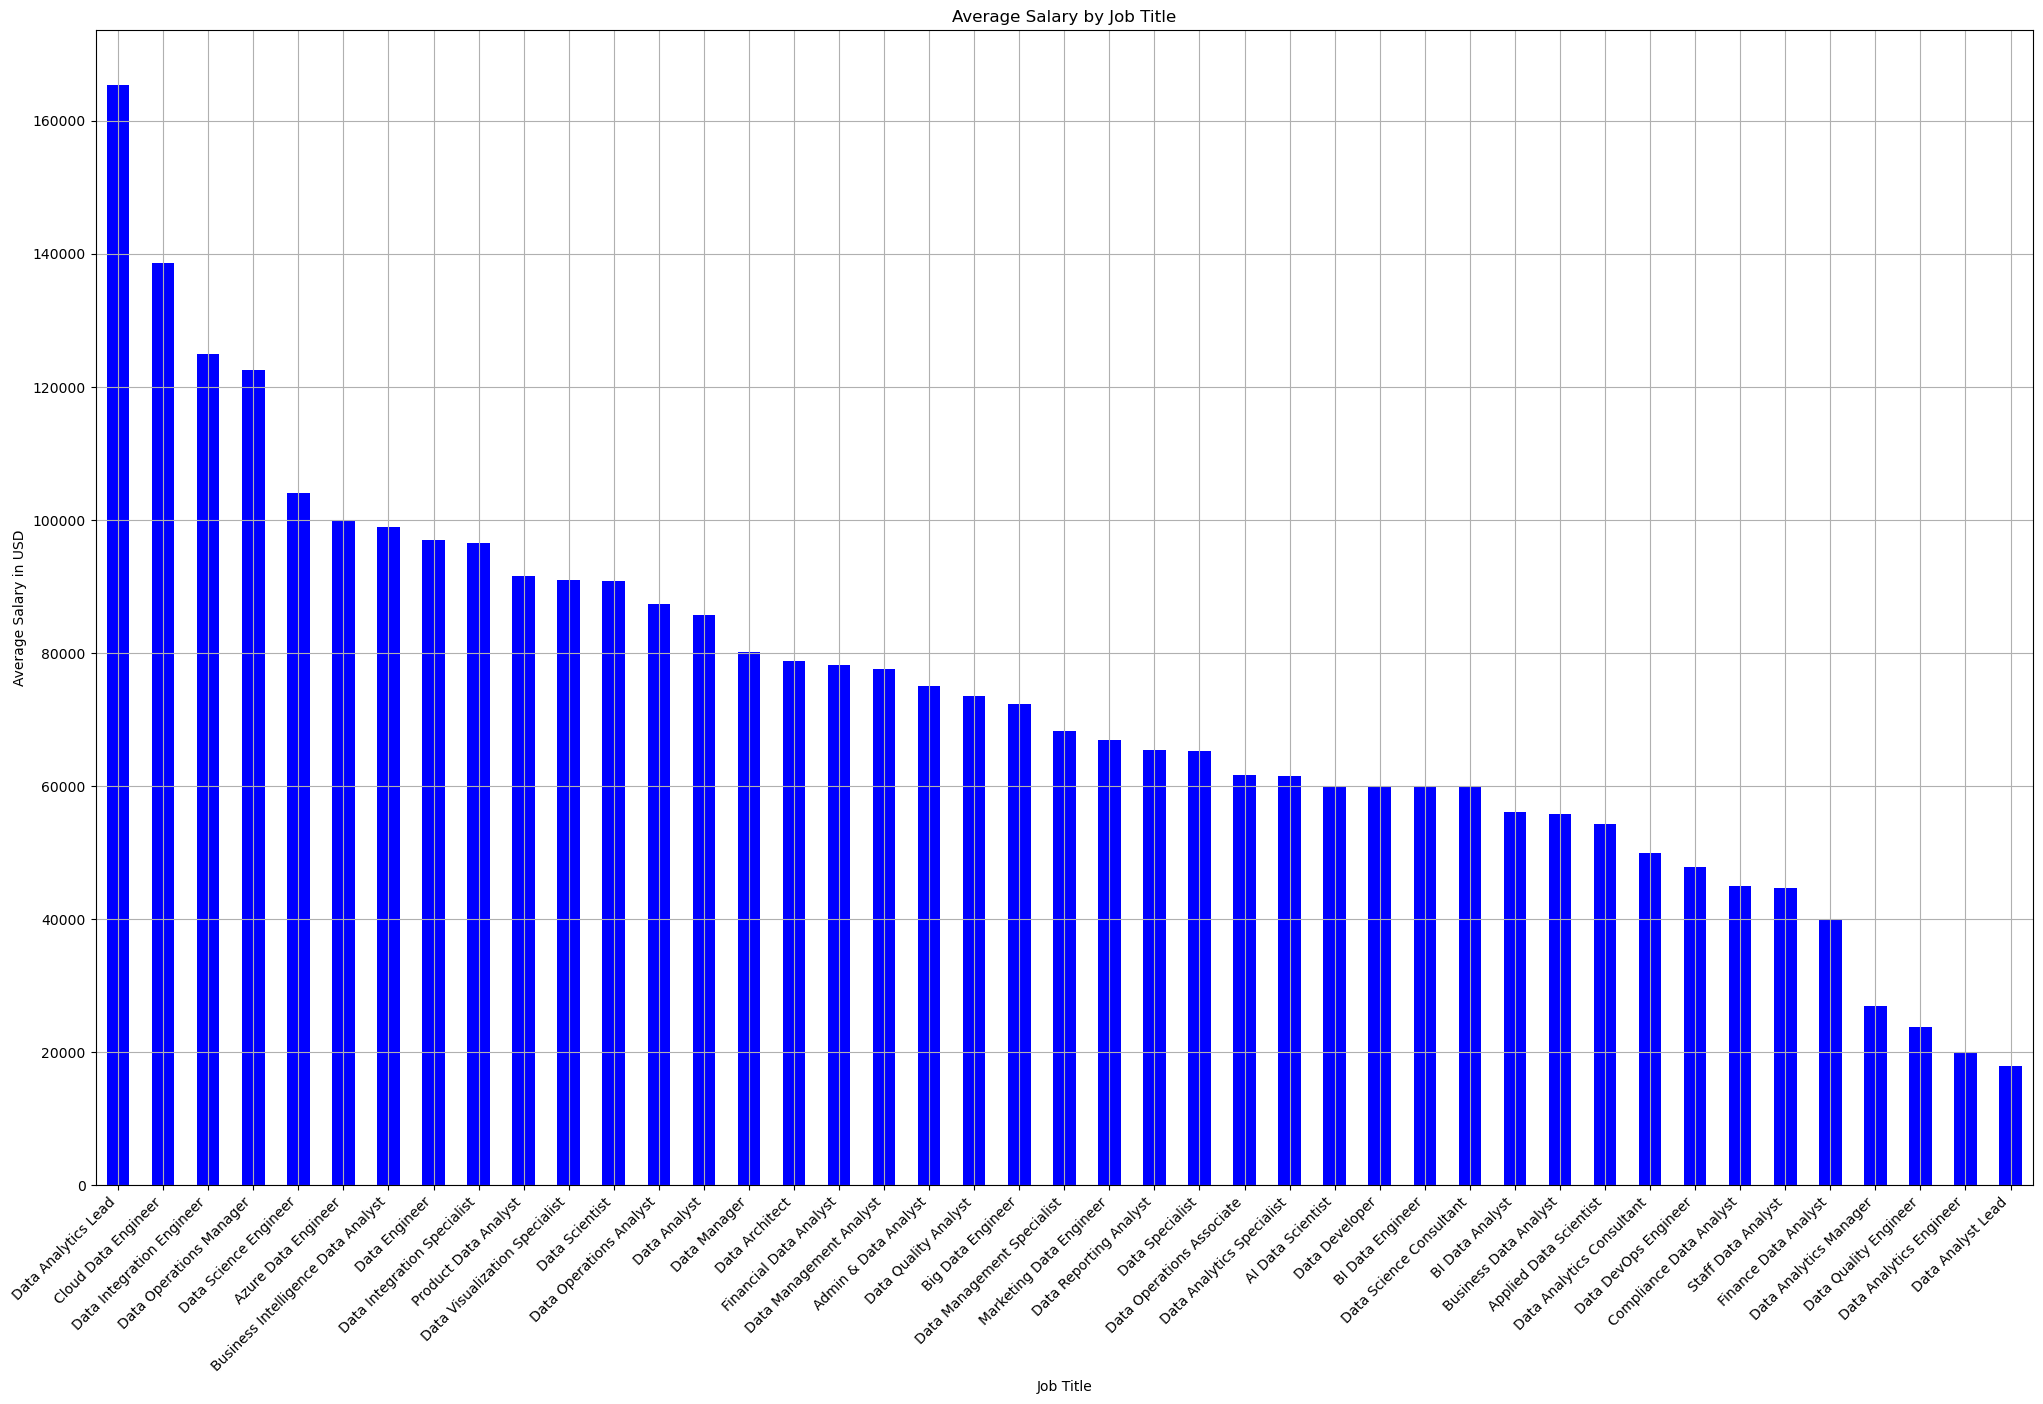

In [46]:
#Sort the values for each average, then plot them through a bar chart
average_salary_by_title.sort_values(ascending=False).plot(kind='bar', figsize=(25, 15), color='blue')
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [47]:
average_salary_by_title.mean()


73065.10794743999

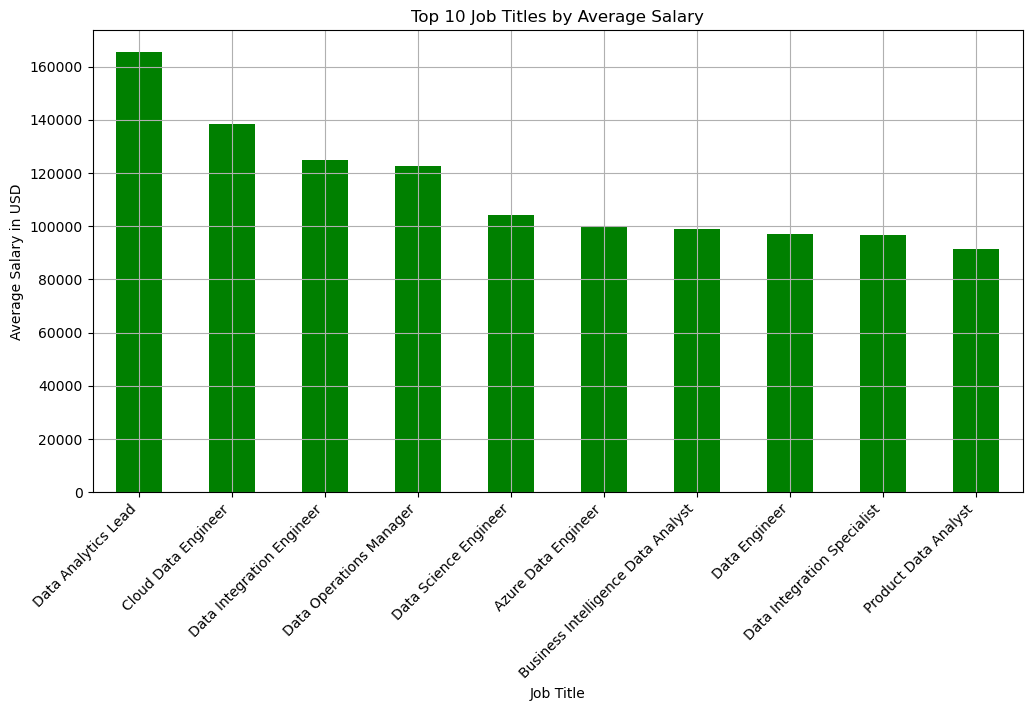

In [48]:

top_10_salaries = average_salary_by_title.sort_values(ascending=False).head(10)

# Plot the top 10 average salaries
top_10_salaries.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Top 10 Job Titles by Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


In [49]:
#The average of the top ten earners in the data set
top_10_salaries.mean()

113961.1611111111

What about the averages for certain titles that are reoccuring? 

In [40]:
#filter the rows for just jobs containing engineer in the title
engineer_df = df[df['job_title'].str.contains('engineer', case=False, na=False)]
engineer_df['salary_in_usd'].mean()

147179.4864553314

In [39]:
#filter the rows for just jobs containing analyst in the title
analyst_df = df[df['job_title'].str.contains('analyst', case=False, na=False)]
analyst_df['salary_in_usd'].mean()

107406.52964509395

In [41]:
#filter the rows for just jobs containing specialist in the title
special_df = df[df['job_title'].str.contains('specialist', case=False, na=False)]
special_df['salary_in_usd'].mean()

96237.7508650519

In [43]:
#filter the rows for just jobs containing scientist in the title
science_df = df[df['job_title'].str.contains('scientist | science', case=False, na=False)]
science_df['salary_in_usd'].mean()

176436.85903083702

<h3>What about jobs that are entry level? <h3>

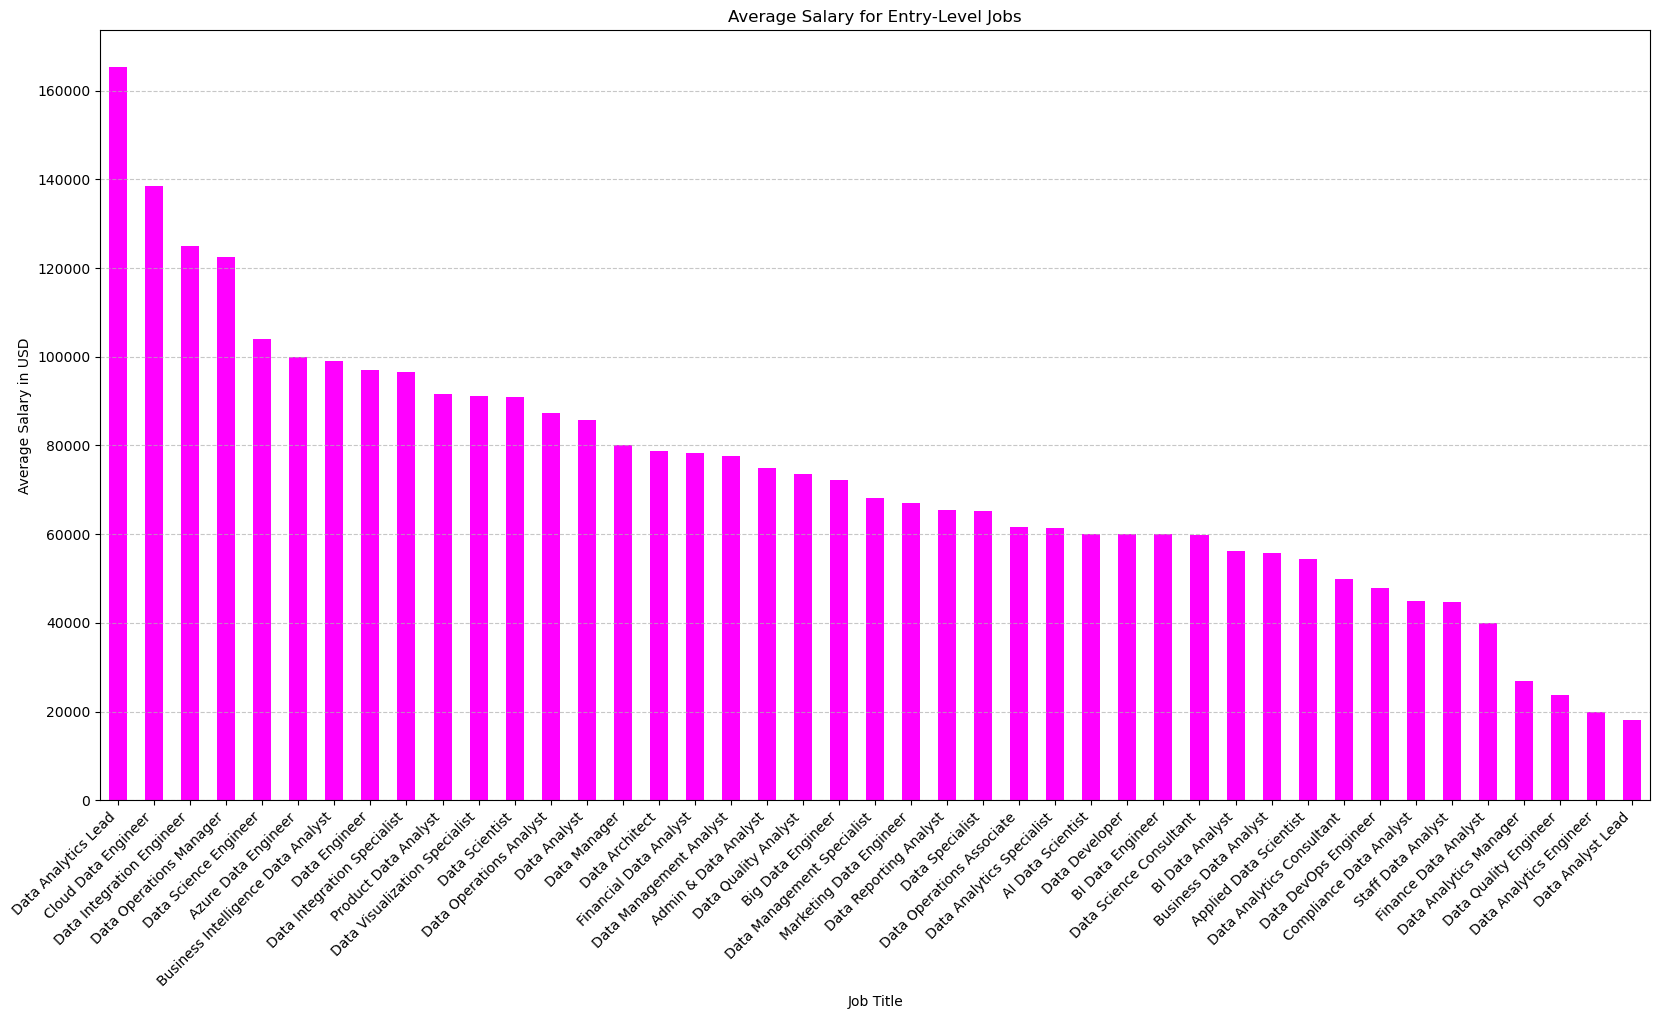

In [29]:

entry_level_jobs = df[df['experience_level'] == 'Entry-level']

# Calculate the average salary by job title for entry-level positions
average_salary_by_title = entry_level_jobs.groupby('job_title')['salary_in_usd'].mean()

# Sort the average salaries in descending order
sorted_salaries = average_salary_by_title.sort_values(ascending=False)

# Plotting the average salaries for entry-level jobs
sorted_salaries.plot(kind='bar', color='magenta', figsize=(20, 10))
plt.title('Average Salary for Entry-Level Jobs')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [30]:
#average salary for all entry-level jobs in this dataframe
sorted_salaries.mean()

73065.10794743999

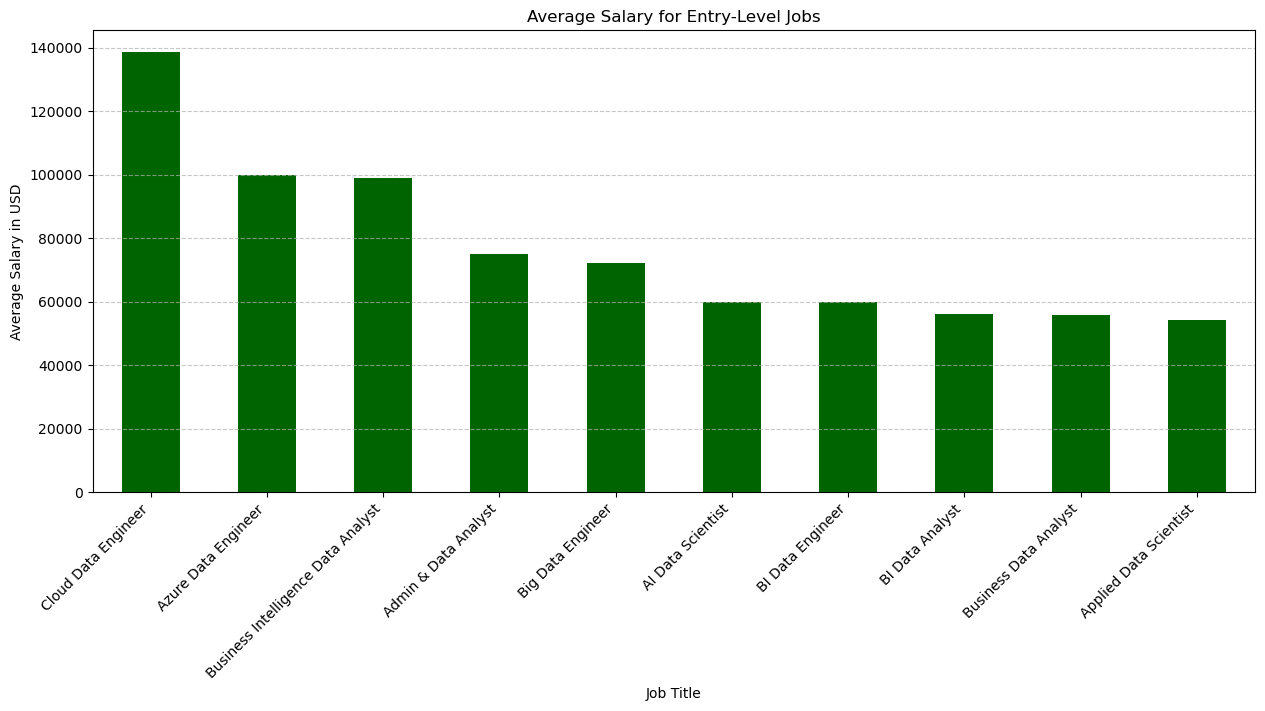

In [11]:

entry_level_jobs = df[df['experience_level'] == 'Entry-level']

# Calculate the average salary by job title for entry-level positions
average_salary_by_title = entry_level_jobs.groupby('job_title')['salary_in_usd'].mean().head(10)

# Sort the average salaries in descending order
sorted_salaries = average_salary_by_title.sort_values(ascending=False)

# Plotting the average salaries for entry-level jobs
sorted_salaries.plot(kind='bar', color='darkgreen', figsize=(15, 6))
plt.title('Average Salary for Entry-Level Jobs')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3> What is the trend between experience level and company size? <h3>

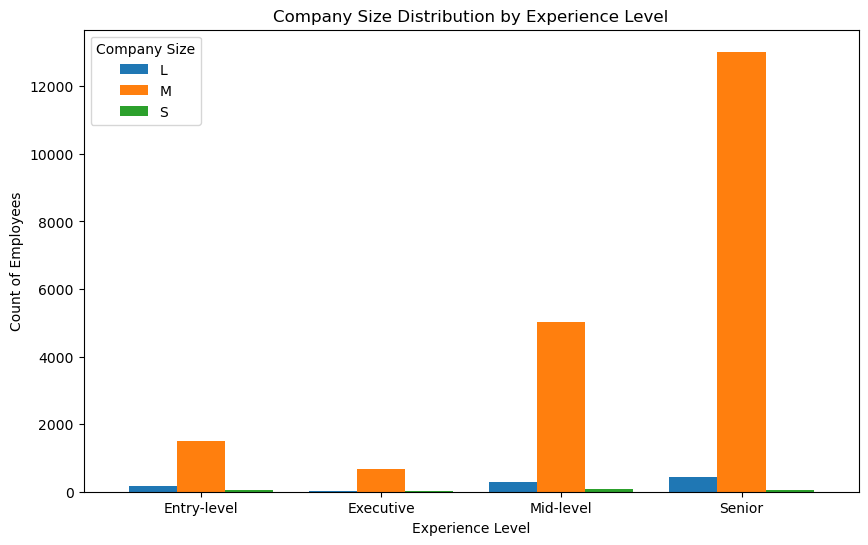

In [22]:
# Create a pivot table
pivot_table = pd.crosstab(index=df['experience_level'], columns=df['company_size'])

# Plotting the pivot table as a grouped bar chart
pivot_table.plot(kind='bar', figsize=(10, 6), width=0.8)  # Adjust width for better visualization
plt.title('Company Size Distribution by Experience Level')
plt.ylabel('Count of Employees')
plt.xlabel('Experience Level')
plt.xticks(rotation=0)
plt.legend(title='Company Size')
plt.show()


Experience Level is rated from entry being the lowest scale, to executive being the highest. The chart above indicates two things: that medium sized companies are the most commmon out of the 21000 jobs that we collected for this dataset, and for most of those companies that are medium in size(which is rated by staff size) are looking for people with senoirity in their positions. Entry level is second to lowest followed by executive roles. 

In [22]:
pivot_table = pd.crosstab(df['experience_level'], df['company_size'])
print(pivot_table)


company_size        L      M   S
experience_level                
Entry-level       165   1489  55
Executive          35    668   9
Mid-level         287   5011  66
Senior            437  13021  59


This table above shows the numbers related to the amount of jobs for each experience level for different company size

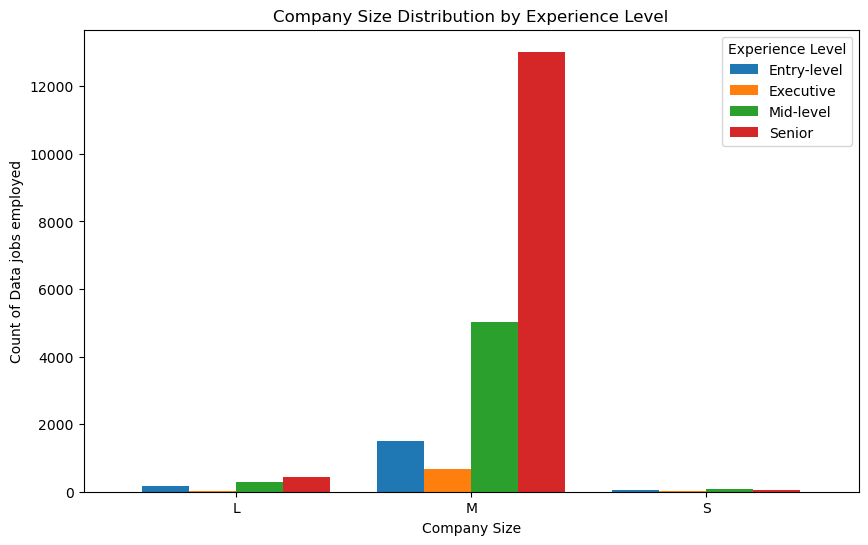

In [7]:
# Create a pivot table
pivot_table = pd.crosstab(index=df['company_size'], columns=df['experience_level'])

# Plotting the pivot table as a grouped bar chart
pivot_table.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Company Size Distribution by Experience Level')
plt.ylabel('Count of Data jobs employed')
plt.xlabel('Company Size')
plt.xticks(rotation=0)
plt.legend(title='Experience Level')
plt.show()


This visualization shows the company size related to the different levels of experience. This table also indictates the medium company size being the most common, followed by large and then small companies. With Senior level being the most common experience level in this data set followed by mid level, we can conclude that companies are more often looking for people who have prior exeperience than someone who will be considered for an entry level role.